<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Visualize Data
</div>

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Read data

In [141]:
annual_pop_df = pd.read_csv("../data/processed/preprocess_OA.csv")

agri_employ_df = pd.read_csv("../data/processed/preprocess_OEA.csv")

rural_employ_df = pd.read_csv("../data/processed/preprocess_OER.csv")

products_df = pd.read_csv("../data/processed/preprocess_QCL.csv")

values_df = pd.read_csv("../data/processed/preprocess_QV.csv")

In [142]:
item = pd.read_csv("../data/external/item_code.csv")
element = pd.read_csv("../data/external/element_code.csv")
pop = pd.read_csv("../data/processed/preprocess_OA.csv")

In [144]:
pop = pop[pop['Element Code'] == 511]
pop = pop.rename(columns={"Value":"Total Population (1000 No)"})
pop = pop.drop(columns=['Note', 'Flag', "Unit", 'Item Code', 'Element Code', 'Area Code', 'Domain Code'])
pop

,Year,Total Population (1000 No)
0,1950,25109.200
5,1951,25627.533
10,1952,26189.593
15,1953,26820.851
20,1954,27507.453
...,...,...
640,2096,92769.682
643,2097,92339.695
646,2098,91907.988
649,2099,91473.455


In [145]:
products_df = products_df.merge(item, how= 'left', on= 'Item Code')
products_df = products_df.merge(pop, how= 'left', on= 'Year')
products_df = products_df.merge(element, how= 'left', on= 'Element Code')
products_df

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Item,Total Population (1000 No),Element
0,QCL,237,5312,711,1961,ha,1000.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",33621.982,Area harvested (ha)
1,QCL,237,5419,711,1961,100 g/ha,7000.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",33621.982,Yield (100 g/ha)
2,QCL,237,5510,711,1961,t,700.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",33621.982,Production (t)
3,QCL,237,5312,711,1962,ha,1000.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",34533.889,Area harvested (ha)
4,QCL,237,5419,711,1962,100 g/ha,7000.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",34533.889,Yield (100 g/ha)
...,...,...,...,...,...,...,...,...,...,...,...,...
15065,QCL,237,5419,1735,2020,100 g/ha,170584.00,E,NaN,Vegetables Primary,96648.685,Yield (100 g/ha)
15066,QCL,237,5510,1735,2020,t,17006433.11,E,NaN,Vegetables Primary,96648.685,Production (t)
15067,QCL,237,5312,1735,2021,ha,1002974.00,E,NaN,Vegetables Primary,97468.029,Area harvested (ha)
15068,QCL,237,5419,1735,2021,100 g/ha,171731.00,E,NaN,Vegetables Primary,97468.029,Yield (100 g/ha)


### The correlation between cereal production and harvested area in Vietnam over the period from 1999 to 2021
-   What is cereal: https://unstats.un.org/unsd/classifications/Econ/Detail/EN/1074/011
    -   Include: Wheat, Maize (corn), Rice, Sorghum, Barley, Rye, Oats, Millet, Triticale, Fonio, Quinoa, Canary seed.

In [146]:
cereal_df = products_df[products_df['Item'].str.contains("Wheat|Rice|Maize|Sorghum|Barley|Rye|Oats|Millet|Triticale|Fonio|Quinoa|Canary seed")]
cereal_df

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Item,Total Population (1000 No),Element
4565,QCL,237,5312,56,1961,ha,260200.0,A,NaN,Maize (corn),33621.982,Area harvested (ha)
4566,QCL,237,5419,56,1961,100 g/ha,11230.0,E,NaN,Maize (corn),33621.982,Yield (100 g/ha)
4567,QCL,237,5510,56,1961,t,292200.0,A,NaN,Maize (corn),33621.982,Production (t)
4568,QCL,237,5312,56,1962,ha,262020.0,X,Unofficial figure,Maize (corn),34533.889,Area harvested (ha)
4569,QCL,237,5419,56,1962,100 g/ha,11987.0,X,Unofficial figure,Maize (corn),34533.889,Yield (100 g/ha)
...,...,...,...,...,...,...,...,...,...,...,...,...
10713,QCL,237,5510,83,2019,t,0.0,M,NaN,Sorghum,95776.716,Production (t)
10714,QCL,237,5312,83,2020,ha,0.0,M,NaN,Sorghum,96648.685,Area harvested (ha)
10715,QCL,237,5510,83,2020,t,0.0,M,NaN,Sorghum,96648.685,Production (t)
10716,QCL,237,5312,83,2021,ha,0.0,M,NaN,Sorghum,97468.029,Area harvested (ha)


-   Look like data with flag `M` is missing data or not exist, drop those data.

In [147]:
cereal_df = cereal_df[cereal_df.Flag != "M"]

In [148]:
data_production = cereal_df[cereal_df['Element Code'] == 5510]
data_production = data_production[data_production.Year.between(1999, 2022)]
data_production

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Item,Total Population (1000 No),Element
4681,QCL,237,5510,56,1999,t,1753100.00,A,NaN,Maize (corn),78123.713,Production (t)
4684,QCL,237,5510,56,2000,t,2005900.00,A,NaN,Maize (corn),79001.142,Production (t)
4687,QCL,237,5510,56,2001,t,2161700.00,A,NaN,Maize (corn),79817.777,Production (t)
4690,QCL,237,5510,56,2002,t,2511200.00,A,NaN,Maize (corn),80642.308,Production (t)
4693,QCL,237,5510,56,2003,t,3136300.00,A,NaN,Maize (corn),81475.825,Production (t)
...,...,...,...,...,...,...,...,...,...,...,...,...
10154,QCL,237,5510,27,2017,t,42763682.38,A,NaN,Rice,94033.048,Production (t)
10157,QCL,237,5510,27,2018,t,44046249.56,A,NaN,Rice,94914.330,Production (t)
10160,QCL,237,5510,27,2019,t,43495487.58,A,NaN,Rice,95776.716,Production (t)
10163,QCL,237,5510,27,2020,t,42764999.76,A,NaN,Rice,96648.685,Production (t)


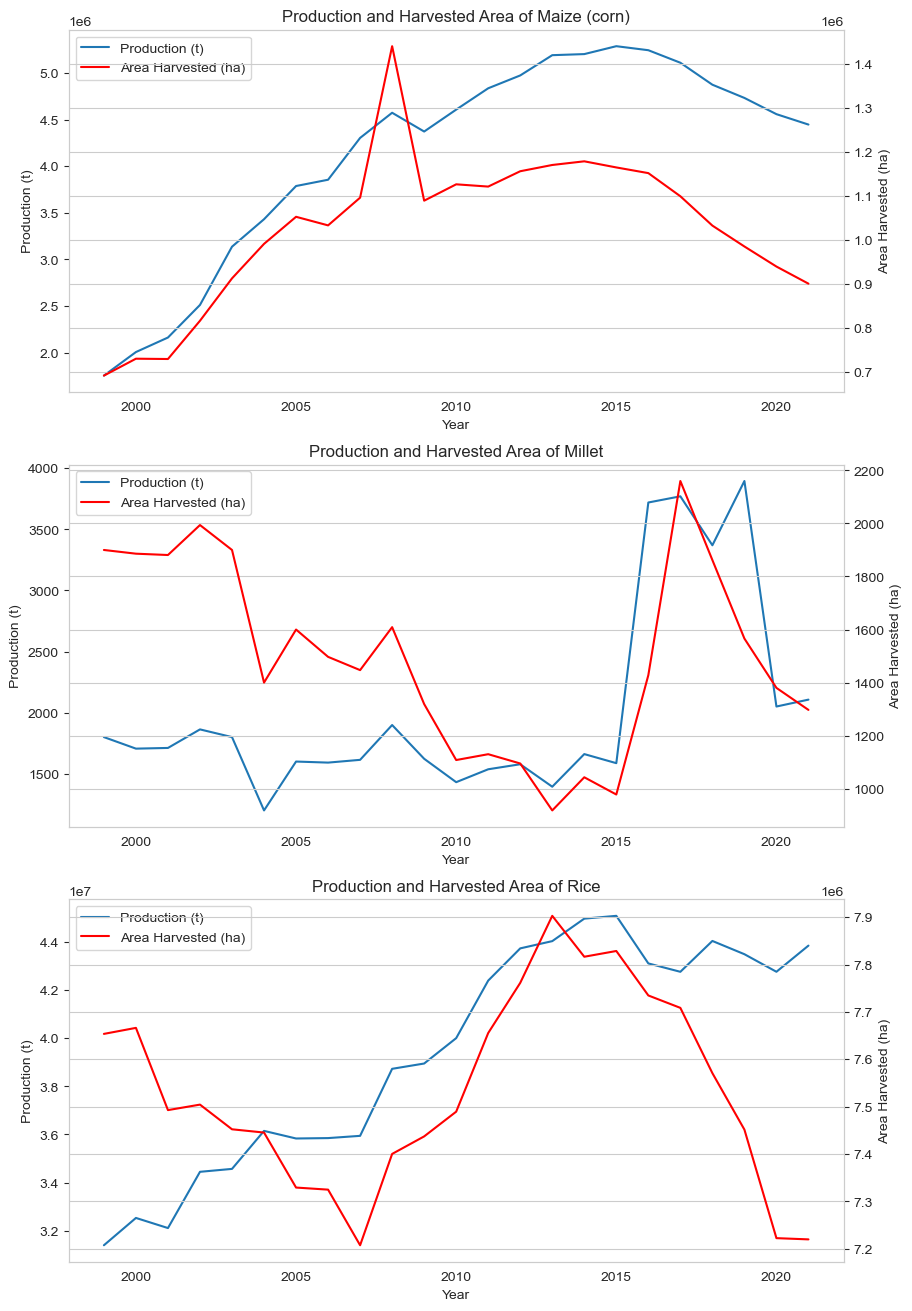

In [149]:
data_production = cereal_df[cereal_df['Element Code'] == 5510]
data_area = cereal_df[cereal_df['Element Code'] == 5312]

data_production = data_production[data_production.Year.between(1999, 2022)]
data_production

data_area = data_area[data_area.Year.between(1999, 2022)]
data_area

n = 0

fig = plt.figure(figsize=(10, 16))

for item in data_production['Item'].unique():
    prod = data_production[data_production['Item'] == item]
    area = data_area[data_area['Item'] == item]
    ax1 = plt.subplot(3, 1, n + 1)

    line1 = ax1.plot(prod.Year,prod.Value, label= "Production (t)")
    ax2 = ax1.twinx()
    line2 = ax2.plot(area.Year,area.Value, label= "Area Harvested (ha)", c= 'r')


    ax1.grid()
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Production (t)")
    ax2.set_ylabel("Area Harvested (ha)")
    ax1.set_title(f"Production and Harvested Area of {item}")
    
    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=0)
    n += 1

plt.show()

In [150]:
prod = data_production[data_production['Item'] == "Maize (corn)"]
print(prod.head(1).Value.values[0])
print(prod.tail(1).Value.values[0])

1753100.0
4446383.17


In [151]:
for item in data_production['Item'].unique():
    prod = data_production[data_production['Item'] == item]
    area = data_area[data_area['Item'] == item]

    perProd = (prod.tail(1).Value.values[0] / prod.head(1).Value.values[0]) * 100
    perArea = (area.tail(1).Value.values[0] / area.head(1).Value.values[0]) * 100
    
    print(item)
    print(prod.tail(1).Value.values[0])
    print(prod.head(1).Value.values[0])
    print(area.tail(1).Value.values[0])
    print(area.head(1).Value.values[0])
    print(perProd)
    print(perArea)
    print("----------------")

Maize (corn)
4446383.17
1753100.0
900673.0
691800.0
253.62975129770123
130.1926857473258
----------------
Millet
2106.63
1800.0
1297.0
1900.0
117.035
68.26315789473684
----------------
Rice
43852728.69
31393800.0
7219797.0
7653600.0
139.68595292701104
94.33203982439636
----------------


### Comment
-   The graph above illustrates the correlation between cereal production and harvested area in Vietnam over the period from 1999 to 2021.
-   Maize (corn):
    -   Production: 
        -   grow discontinous, grow about: $$\frac{4446383.17}{1753100.00} * 100\% =  253.63\% $$
        -   Area Harvested: grow discontinous, grow about: $$\frac{900673.0}{691800.0} * 100\% =  130.19\% $$   
-   Millet:
    -   Production: grow discontinous, grow about: $$\frac{2106.63}{1800.0} * 100\% =  117.035\% $$
    -   Area Harvested: fall discontinous, fall about: $$\frac{1297.0}{1900.0} * 100\% =  68.26\% $$
-   Rice:
    -   Production: grow discontinous, grow about: $$\frac{43852728.69}{31393800.0} * 100\% =  139.69\% $$
    -   Area Harvested: grow discontinous, grow about: $$\frac{7219797.0}{7653600.0} * 100\% =  94.33\% $$

-   In conclusion: from 1999 to 2021: 
    -   Production of `Maize (corn)`, `Millet`, and `Rice` increase dramatically (over 100%)
    -   Area Harvested of `Maize (corn)` and `Rice` increase dramatically (over 100%)
    -   Expect for Area Harvested of `Millet`, which significantly (about 68.26%)